In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

sns.set()
from sklearn.linear_model import LinearRegression

In [3]:
Data = pd.read_csv('Datasets\Real-life example.csv')

In [4]:
Data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [5]:
Data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
#since model has 312 unique values, it should be dropped

new_data = Data.drop(['Model'], axis = 1)
new_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [7]:
new_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
data_no_na = new_data.dropna(axis = 'index')

In [9]:
data_no_na.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


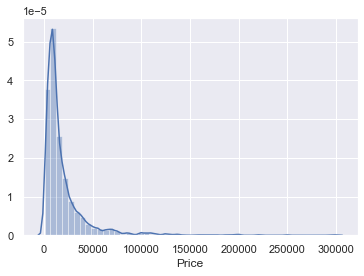

In [10]:
#plotting normal distribution of the price column features
sns.distplot(data_no_na['Price'])

In [11]:
Q = data_no_na['Price'].quantile(0.99)
Data_1 = data_no_na[data_no_na['Price']<Q]
Data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


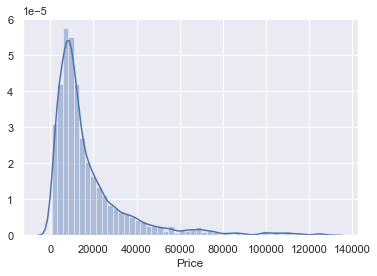

In [12]:
#After reducing outliers
sns.distplot(Data_1['Price'])

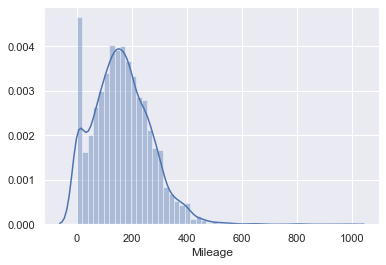

In [13]:
sns.distplot(data_no_na['Mileage'])

In [14]:
Q1 = Data_1['Mileage'].quantile(0.99)
Data_2 = Data_1[Data_1['Mileage']<Q1]
Data_2.describe()

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,17933.880822,161.484026,2.747612,2006.389959
std,19008.212025,96.027108,4.980406,6.595986
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21376.250000,230.000000,3.000000,2011.000000
max,129222.000000,435.000000,99.990000,2016.000000


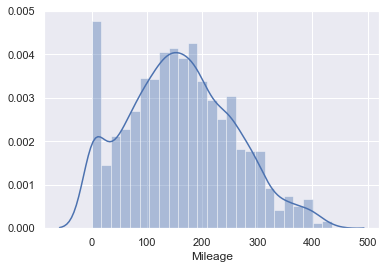

In [15]:
#After removing outliers...
sns.distplot(Data_2['Mileage'])

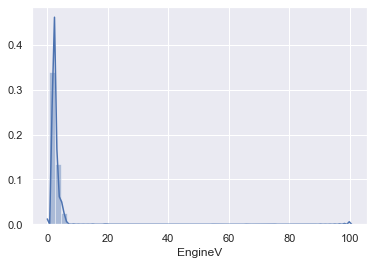

In [16]:
sns.distplot(data_no_na['EngineV'])

In [17]:
Data_3 = Data_2[Data_2['EngineV']<6.5]

,Price,Mileage,EngineV,Year
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,17988.421311,161.279776,2.443497,2006.406019
std,19041.658686,96.068269,0.946198,6.595871
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21500.000000,229.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


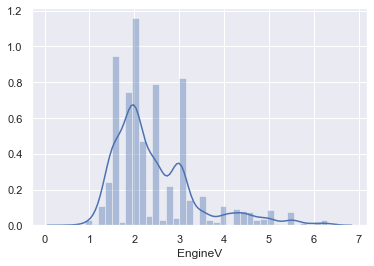

In [18]:
sns.distplot(Data_3['EngineV'])
Data_3.describe()

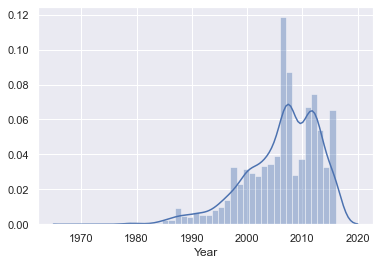

In [19]:
sns.distplot(data_no_na['Year'])

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


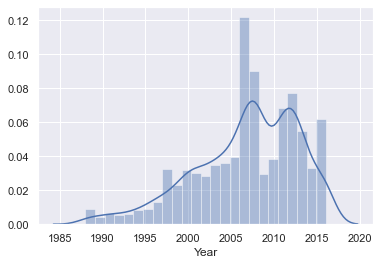

In [20]:
Q2 = Data_3['Year'].quantile(0.01)
Data_4 = Data_3[Data_3['Year']>Q2]
sns.distplot(Data_4['Year'])
Data_4.describe()

In [21]:
cleaned_data = Data_4.reset_index(drop = True)

In [22]:
cleaned_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


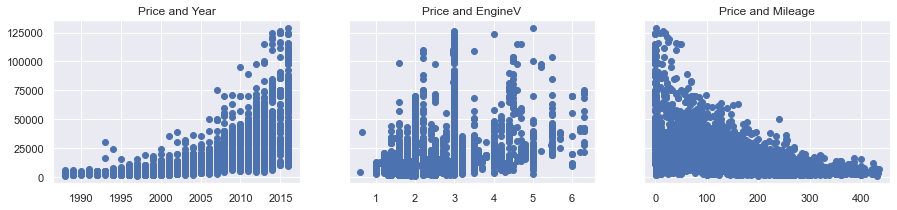

In [23]:
fig, (ax1, ax2 , ax3) = plt.subplots(1, 3, sharey = True, figsize =(15,3))

ax1.scatter(cleaned_data['Year'],cleaned_data['Price'])
ax1.set_title('Price and Year')
ax2.scatter(cleaned_data['EngineV'],cleaned_data['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(cleaned_data['Mileage'],cleaned_data['Price'])
ax3.set_title('Price and Mileage')
plt.show()

In [24]:
log_price = np.log(cleaned_data['Price'])
cleaned_data['log_price'] = log_price

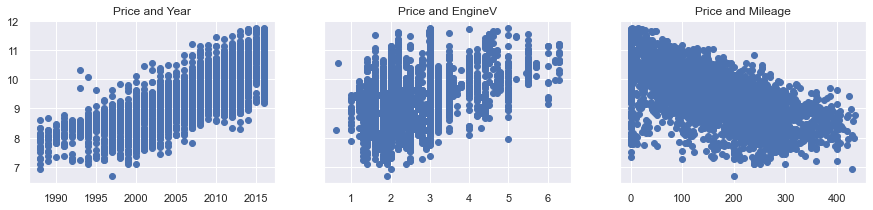

In [25]:
fig, (ax1, ax2 , ax3) = plt.subplots(1, 3, sharey = True, figsize =(15,3))

ax1.scatter(cleaned_data['Year'],cleaned_data['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(cleaned_data['EngineV'],cleaned_data['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(cleaned_data['Mileage'],cleaned_data['log_price'])
ax3.set_title('Price and Mileage')
plt.show()

In [37]:
#studying our model multicolllineariy
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[['Year', 'Mileage', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns



In [38]:
vif
#here year has a factor above 10 so its removed in next step

,VIF,features
0,10.354854,Year
1,3.791584,Mileage
2,7.662068,EngineV


In [41]:
data_no_multi = cleaned_data.drop(['Year'], axis = 1)

In [42]:
data_with_dummies = pd.get_dummies(data_no_multi, drop_first = True)

In [43]:
data_with_dummies

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,11500.0,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,17900.0,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,125000.0,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,6500.0,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [45]:
dependent = data_with_dummies['log_price']
independent = data_with_dummies.drop(['log_price'], axis = 1)

In [46]:
#Doing feature scaling by standardizing our data
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
stdscaler.fit(independent)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
scaled_independent = stdscaler.transform(independent)

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_independent, dependent, test_size=0.2, random_state=365)

In [49]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
#Predicting outputs from training data
y_hat = reg.predict(x_train)

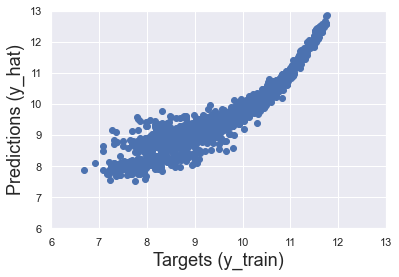

In [52]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

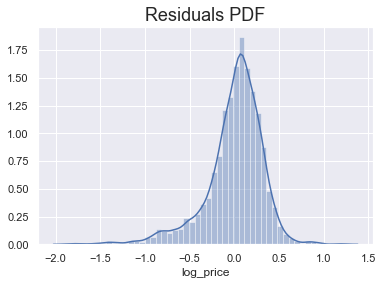

In [53]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [54]:
#calculating variability
reg.score(x_train,y_train)

0.8613387128149418

In [56]:
reg.intercept_ 

9.417887576235454

In [62]:
reg.coef_

array([ 0.47016103, -0.20613177,  0.10134996,  0.002997  , -0.01018191,
       -0.06544045, -0.09865781, -0.0119512 , -0.0356834 , -0.07932256,
       -0.03509751, -0.09525154, -0.0571305 , -0.0705021 , -0.04685037,
       -0.01234463, -0.05755958,  0.25218298])

In [63]:
reg_summary = pd.DataFrame(independent.columns.values , columns=['Features'])
reg_summary['coefficients'] = reg.coef_
reg_summary

,Features,coefficients
0,Price,0.470161
1,Mileage,-0.206132
2,EngineV,0.101350
3,Brand_BMW,0.002997
4,Brand_Mercedes-Benz,-0.010182
5,Brand_Mitsubishi,-0.065440
6,Brand_Renault,-0.098658
7,Brand_Toyota,-0.011951
8,Brand_Volkswagen,-0.035683
9,Body_hatch,-0.079323


In [64]:
y_hat_test = reg.predict(x_test)

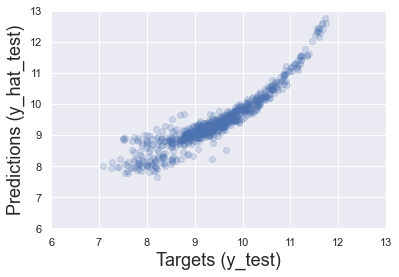

In [65]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [66]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,7671.678950
1,3451.852695
2,6583.722260
3,7567.870652
4,9322.901287


In [67]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,7671.678950,NaN
1,3451.852695,7900.0
2,6583.722260,NaN
3,7567.870652,NaN
4,9322.901287,NaN
...,...,...
769,24143.360699,6950.0
770,9885.418094,NaN
771,13597.976801,NaN
772,69369.797754,NaN


In [68]:
y_test = y_test.reset_index(drop=True)

y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [69]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,7671.678950,2300.0
1,3451.852695,2800.0
2,6583.722260,2500.0
3,7567.870652,6400.0
4,9322.901287,9150.0
...,...,...
769,24143.360699,29500.0
770,9885.418094,9600.0
771,13597.976801,18300.0
772,69369.797754,68500.0


In [70]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,7671.678950,2300.0,-5371.678950,233.551259
1,3451.852695,2800.0,-651.852695,23.280453
2,6583.722260,2500.0,-4083.722260,163.348890
3,7567.870652,6400.0,-1167.870652,18.247979
4,9322.901287,9150.0,-172.901287,1.889632
...,...,...,...,...
769,24143.360699,29500.0,5356.639301,18.158099
770,9885.418094,9600.0,-285.418094,2.973105
771,13597.976801,18300.0,4702.023199,25.694116
772,69369.797754,68500.0,-869.797754,1.269778
